In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import matplotlib.pylab as plt
import numpy as np
from corsika_comparison import (corsika_hist, combined_data, 
                                corsika_en_theta_2dhist)

In [21]:
en_hist = corsika_hist(en_bins = np.geomspace(1e-2, 1e2, 51))
en_hist1 = corsika_hist(en_bins = np.geomspace(1e-2, 1e2, 51), 
                       h5file="corsika_leptons.h5")

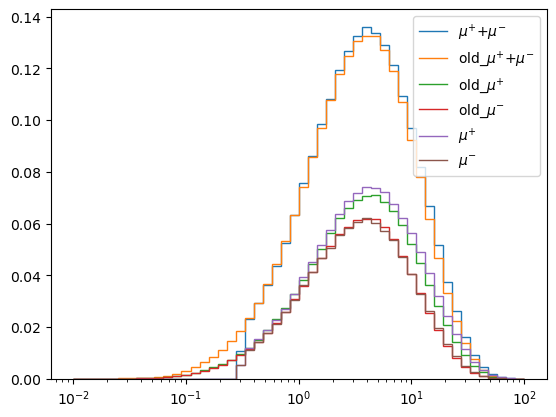

In [25]:

ixdepth = 3
pdg = 13
cdata = combined_data(en_hist, (-pdg, pdg), ixdepth)
plt.stairs(*cdata[0:2], label = cdata[2])

cdata = combined_data(en_hist1, (-pdg, pdg), ixdepth)
plt.stairs(*cdata[0:2], label = f"old_{cdata[2]}")

cdata = combined_data(en_hist1, (-pdg,), ixdepth)
plt.stairs(*cdata[0:2], label = f"old_{cdata[2]}")

cdata = combined_data(en_hist1, (pdg,), ixdepth)
plt.stairs(*cdata[0:2], label = f"old_{cdata[2]}")

cdata = combined_data(en_hist, (-pdg,), ixdepth)
plt.stairs(*cdata[0:2], label = cdata[2])

cdata = combined_data(en_hist, (pdg,), ixdepth)
plt.stairs(*cdata[0:2], label = cdata[2])

plt.xscale("log")
plt.legend()

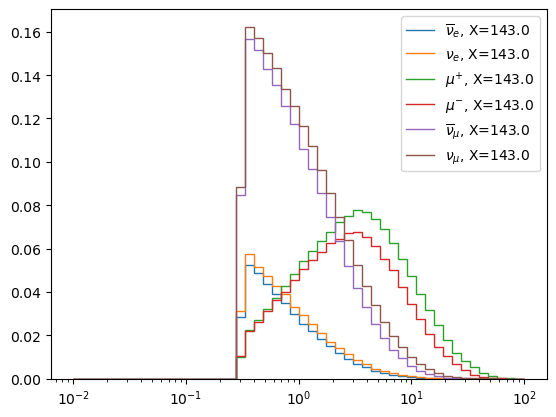

In [7]:

ixdepth = 0
for pdg in en_hist:
    plt.stairs(en_hist[pdg][0][ixdepth][0], en_hist[pdg][0][ixdepth][1], label = f"{en_hist[pdg][1]}, X={en_hist[pdg][0][ixdepth][2]}")

plt.xscale("log")
plt.legend()

# Test 2D

In [24]:
en_theta_dist = corsika_en_theta_2dhist(en_bins = np.geomspace(1e-2, 1e2, 51),
                        theta_bins = np.linspace(0, 60 * np.pi/180))

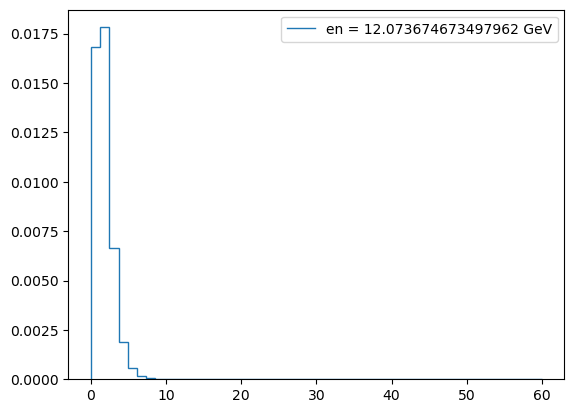

In [31]:
pdg = 13
ixdepth = 0
ind_energy = 38
ang_dist = en_theta_dist[pdg][0][ixdepth][0][ind_energy]
en_bins = en_theta_dist[pdg][0][ixdepth][1]
cur_en = (en_bins[ind_energy] + en_bins[ind_energy + 1])/2 
ang_bins = en_theta_dist[pdg][0][ixdepth][2]*180/np.pi

plt.stairs(ang_dist, ang_bins, label = f"en = {cur_en} GeV")
plt.legend()
